<a href="https://colab.research.google.com/github/tinouirini/Homework/blob/main/Homework_lesson11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

sentiment analysis στα δεδομένα του skai.gr

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/skai.gr-MAY23 (1).csv")

In [3]:
#!python -m spacy download el_core_news_sm

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [11]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [12]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [32]:

import spacy

nlp = spacy.load('el_core_news_sm')

In [33]:
full_articles_df = pd.read_csv("/content/gdrive/MyDrive/skai.gr-MAY23 (1).csv")

In [34]:
len(full_articles_df)

full_articles_df.head(1)

,site,url,date,section,title,author,text
0,skai.gr,https://www.skai.gr/news/world/to-vatikano-sym...,2023-05-01,Κόσμος,Το Βατικανό συμμετέχει σε ειρηνευτική αποστολή...,ΑΠΕ-ΜΠΕ,Το Βατικανό εμπλέκεται σε μια ειρηνευτική αποσ...


In [84]:
short_fa_df = full_articles_df[['date','text' ]]
short_df = short_fa_df.rename(columns={'text': 'text'} )
short_fa_df.tail()
#είναι ήδη text βεβαία

,date,text
5161,2023-05-31,"""Επιδιώκουμε φορολογική δικαιοσύνη και αντιμε..."
5162,2023-05-31,Ο Γιώργος Καραγκούνης συναντήθηκε με τον παλιό...
5163,2023-05-31,Σαν σήμερα - 31 Μαΐου 2023 Ιστορικά και πολιτι...
5164,2023-05-31,Το Κυπριακό και οι ελληνοτουρκικές σχέσεις συμ...
5165,2023-05-31,«Μετά από τις κωμικοτραγικές αντιφάσεις των στ...


In [85]:
short_fa_df.dtypes

date    object
text    object
dtype: object

In [92]:
short_fa_df['date'] = pd.to_datetime(short_fa_df['date'], format='%Y-%m-%d')

<ipython-input-92-b69e6db71503>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_fa_df['date'] = pd.to_datetime(short_fa_df['date'], format='%Y-%m-%d')


In [93]:
short_fa_df['text'] = short_fa_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)

<ipython-input-93-7d1f2c7144ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_fa_df['text'] = short_fa_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)


In [94]:
emolex_df['word'].head(-10)

0                    αφεση
1          ενορκη βεβαιωση
2                  εχοντας
3                      εχω
4                     οριο
               ...        
13146             μαραμενο
13147              αλιμονο
13148        επιδεινωνεται
13149         αποσπω βιαια
13150    καρπος του χεριου
Name: word, Length: 13151, dtype: object

In [39]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [40]:
matrix = vec.fit_transform(short_fa_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
emolex_df.drop_duplicates(subset=['word'])

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
wordcount_df.shape

(5166, 13161)

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
CountVectorizer(stop_words='english', binary=True)


CountVectorizer(analyzer = 'word',
                strip_accents = 'unicode',
                token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}',
                stop_words= lc_stop_words_df['stop_w'].tolist())

NameError: name 'lc_stop_words_df' is not defined

In [44]:
emolex_df.head(10)

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ορμος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,υδρα,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,αγια τραπεζα,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,αμην,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,απατσι,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [43]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [46]:

# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [47]:
trust_words

8                        αμην
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
38                 επικοινωνω
45                   εκκλησια
                 ...         
13039                  αληθης
13075             αναμφιβολως
13079             ανυπερβατος
13113            αναθηματικος
13114       αποδειξη πληρωμης
Name: word, Length: 1259, dtype: object

In [48]:
wordcount_df.tail(10)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
5156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
wordcount_df[trust_words].tail(1)

,αμην,γαμηλιο ταξιδι,διευθυντρια σχολειου,επικοινωνω,εκκλησια,εν τω μεταξυ,ευαγγελιο,κυριε,λιστα ελεγχου,λυρικη σκηνη,...,ηλιακο ωρολογιο,συνεργιστικος,διπλο ποδηλατο,ισαξιος,ανακωχη,αληθης,αναμφιβολως,ανυπερβατος,αναθηματικος,αποδειξη πληρωμης
5165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
wordcount_df[trust_words].sum(axis=1)

0       16
1        2
2        0
3        8
4        0
        ..
5161    10
5162     0
5163     7
5164     9
5165     2
Length: 5166, dtype: int64

In [51]:
short_fa_df.head(3)

,date,text
0,2023-05-01,Το Βατικανό εμπλέκεται σε μια ειρηνευτική αποσ...
1,2023-05-01,Τουλάχιστον δεκαοκτώ μεξικανοί τουρίστες σκοτώ...
2,2023-05-01,"Του Προφήτου Ιερεμία, του Αγίου Πανάρετου, της..."


In [52]:
short_fa_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_fa_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_fa_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_fa_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_fa_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_fa_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_fa_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_fa_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_fa_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_fa_df['fear'] = wordcount_df[fear_words].sum(axis=1)

<ipython-input-52-1534634baf53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_fa_df['anger'] = wordcount_df[angry_words].sum(axis=1)
<ipython-input-52-1534634baf53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_fa_df['positive'] = wordcount_df[positive_words].sum(axis=1)
<ipython-input-52-1534634baf53>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [74]:
short_fa_df

,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear,pos/neg
date,,,,,,,,,,,,,
2023-05-01,0,Το Βατικανό εμπλέκεται σε μια ειρηνευτική αποσ...,4,19,8,4,3,16,11,8,14,7,5
2023-05-01,1,Τουλάχιστον δεκαοκτώ μεξικανοί τουρίστες σκοτώ...,1,5,3,1,1,2,2,1,2,2,3
2023-05-01,2,"Του Προφήτου Ιερεμία, του Αγίου Πανάρετου, της...",0,1,0,0,0,0,0,0,0,0,1
2023-05-01,3,Μολονότι επισήμως η βρετανική κυβέρνηση ολοκλή...,5,9,1,1,0,8,3,2,7,8,2
2023-05-01,4,Υπό μερικό έλεγχο βρίσκεται πυρκαγιά που ξέσπα...,2,2,0,0,0,0,1,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,5161,"""Επιδιώκουμε φορολογική δικαιοσύνη και αντιμε...",2,11,3,3,3,10,3,2,7,1,4
2023-05-31,5162,Ο Γιώργος Καραγκούνης συναντήθηκε με τον παλιό...,0,0,0,0,0,0,0,0,1,0,-1
2023-05-31,5163,Σαν σήμερα - 31 Μαΐου 2023 Ιστορικά και πολιτι...,5,17,5,1,2,7,2,3,6,5,11


In [76]:
short_fa_df.set_index('index', inplace=True)
short_fa_df.head()


,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear,pos/neg
index,,,,,,,,,,,,
0,Το Βατικανό εμπλέκεται σε μια ειρηνευτική αποσ...,4,19,8,4,3,16,11,8,14,7,5
1,Τουλάχιστον δεκαοκτώ μεξικανοί τουρίστες σκοτώ...,1,5,3,1,1,2,2,1,2,2,3
2,"Του Προφήτου Ιερεμία, του Αγίου Πανάρετου, της...",0,1,0,0,0,0,0,0,0,0,1
3,Μολονότι επισήμως η βρετανική κυβέρνηση ολοκλή...,5,9,1,1,0,8,3,2,7,8,2
4,Υπό μερικό έλεγχο βρίσκεται πυρκαγιά που ξέσπα...,2,2,0,0,0,0,1,0,2,2,0


<Axes: >

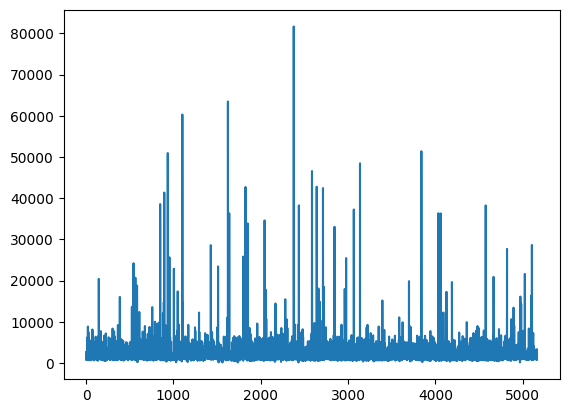

In [78]:
short_fa_df['text'].str.len().groupby(by=short_fa_df.index).mean().plot()